In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sm= pd.read_csv("social_media_engagement.csv")

In [11]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          1000 non-null   int64 
 1   platform         1000 non-null   object
 2   post_type        1000 non-null   object
 3   post_time        1000 non-null   object
 4   caption          1000 non-null   object
 5   hashtags         1000 non-null   object
 6   likes            1000 non-null   int64 
 7   comments         1000 non-null   int64 
 8   shares           1000 non-null   int64 
 9   caption_length   1000 non-null   int64 
 10  num_hashtags     1000 non-null   int64 
 11  post_hour        1000 non-null   int64 
 12  post_day         1000 non-null   object
 13  sentiment_score  1000 non-null   object
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [9]:
sm.head()

,post_id,platform,post_type,post_time,caption,hashtags,likes,comments,shares,caption_length,num_hashtags,post_hour,post_day,sentiment_score
0,1,Facebook,image,2023-08-17 14:45,Best day ever! 🎉,#Social,2121,474,628,16,1,14,Thursday,positive
1,2,Facebook,carousel,2023-05-14 00:45,Here's a quick update.,"#Family, #Community, #Events",3660,432,694,22,3,0,Sunday,neutral
2,3,Instagram,poll,2023-02-21 16:15,Not my best day. 😞,"#Beauty, #Fashion, #InstaDaily",4955,408,688,18,3,16,Tuesday,negative
3,4,Twitter,image,2023-11-16 00:45,Disappointed but moving on.,"#Trending, #Tech, #Entertainment",1183,90,187,27,3,0,Thursday,negative
4,5,Twitter,video,2023-05-23 00:30,Exciting news! 🚀,"#News, #Politics, #Entertainment",3499,247,286,16,3,0,Tuesday,positive


In [10]:
sm.tail()

,post_id,platform,post_type,post_time,caption,hashtags,likes,comments,shares,caption_length,num_hashtags,post_hour,post_day,sentiment_score
995,996,Instagram,video,2023-04-25 07:15,Not my best day. 😞,"#Beauty, #Travel, #Tech",5000,338,420,18,3,7,Tuesday,negative
996,997,Twitter,image,2023-09-09 07:30,Could be better.,"#Tech, #Sports, #Entertainment",880,90,45,16,3,7,Saturday,negative
997,998,Instagram,video,2023-08-18 23:15,Feeling down today.,#Photography,5000,263,274,19,1,23,Friday,negative
998,999,Facebook,text,2023-10-05 00:15,Best day ever! 🎉,#Friends,1075,46,21,16,1,0,Thursday,positive
999,1000,Twitter,poll,2023-09-11 21:15,Here's a quick update.,"#Trending, #Sports",485,195,173,22,2,21,Monday,neutral


In [12]:
sm.nunique()

post_id            1000
platform              3
post_type             5
post_time           986
caption              12
hashtags            400
likes               859
comments            393
shares              619
caption_length        8
num_hashtags          3
post_hour            24
post_day              7
sentiment_score       3
dtype: int64

In [13]:
sm.isnull().sum()

post_id            0
platform           0
post_type          0
post_time          0
caption            0
hashtags           0
likes              0
comments           0
shares             0
caption_length     0
num_hashtags       0
post_hour          0
post_day           0
sentiment_score    0
dtype: int64

In [30]:
sm.columns

Index(['post_id', 'platform', 'post_type', 'post_time', 'caption', 'hashtags',
       'likes', 'comments', 'shares', 'caption_length', 'num_hashtags',
       'post_hour', 'post_day', 'sentiment_score'],
      dtype='object')

In [32]:
sm["platform"].value_counts()

platform
Instagram    345
Twitter      328
Facebook     327
Name: count, dtype: int64

In [36]:
sm[["likes", "comments", "shares"]].describe()

,likes,comments,shares
count,1000.000000,1000.000000,1000.000000
mean,2270.051000,218.247000,420.810000
std,1500.915826,141.891822,285.583266
min,0.000000,10.000000,0.000000
25%,1016.750000,97.000000,185.750000
50%,2047.000000,186.000000,375.500000
75%,3453.250000,327.250000,654.500000
max,5000.000000,500.000000,1000.000000


In [37]:
sm.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
likes,1000.0,2270.051,1500.915826,0.0,1016.75,2047.0,3453.25,5000.0
comments,1000.0,218.247,141.891822,10.0,97.00,186.0,327.25,500.0
shares,1000.0,420.810,285.583266,0.0,185.75,375.5,654.50,1000.0
caption_length,1000.0,19.699,3.375173,16.0,17.00,18.0,23.00,27.0
num_hashtags,1000.0,1.988,0.815181,1.0,1.00,2.0,3.00,3.0
post_hour,1000.0,11.048,6.853077,0.0,5.00,11.0,17.00,23.0


In [47]:
cat_cols= sm.select_dtypes(include=['object']).columns.tolist()
num_cols = sm.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


Categorical Variables:
['platform', 'post_type', 'post_time', 'caption', 'hashtags', 'post_day', 'sentiment_score']
Numerical Variables:
['post_id', 'likes', 'comments', 'shares', 'caption_length', 'num_hashtags', 'post_hour']


In [ ]:
# -------------------------------Graphs Using matplotlib------------------------------------

likes
Skew: 0.33


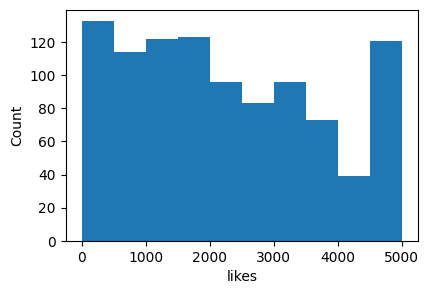

comments
Skew: 0.54


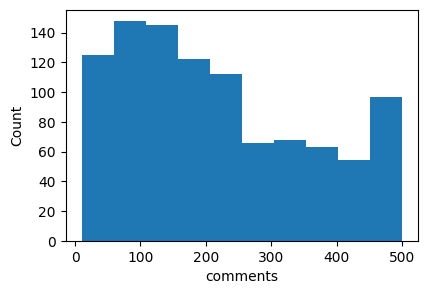

shares
Skew: 0.42


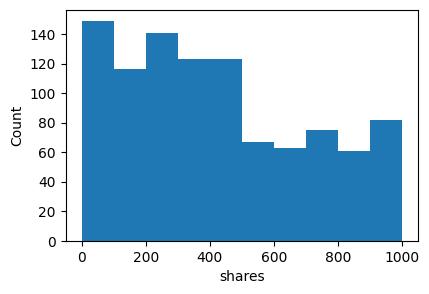

In [ ]:
#Histogram


num_cols = ['likes', 'comments', 'shares']
for col in num_cols:
    print(f"{col}")
    print('Skew:', round(sm[col].skew(), 2))
    
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sm[col].hist(grid=False)
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.show()

likes


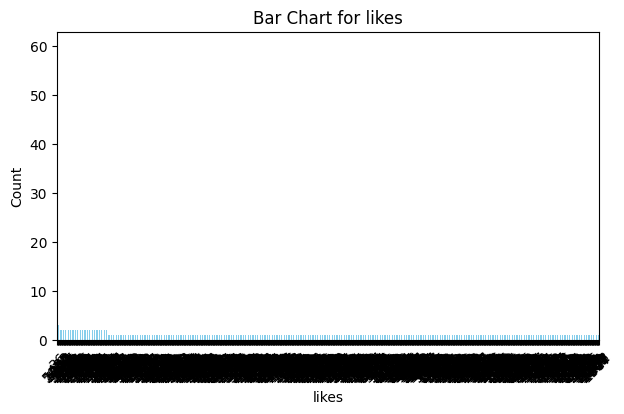

comments


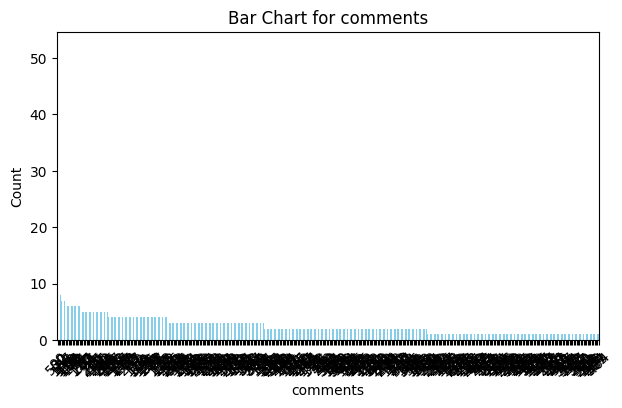

shares


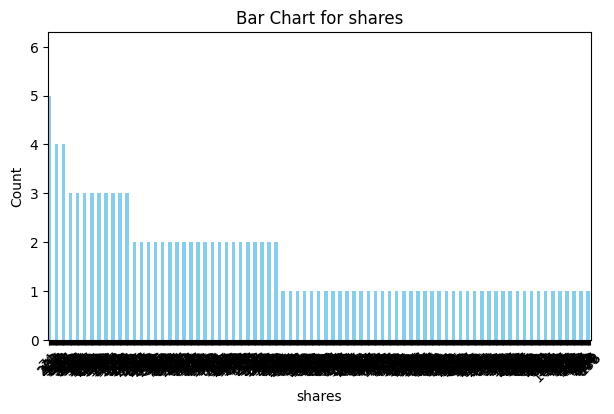

In [ ]:
#Bar chart


num_cols = ['likes', 'comments', 'shares']
    
for col in num_cols:
        print(f"{col}")
        
        plt.figure(figsize=(7,4))
        sm[col].value_counts().plot(kind='bar', color='skyblue')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title(f'Bar Chart for {col}')
        plt.xticks(rotation=45)
        plt.show()


platform


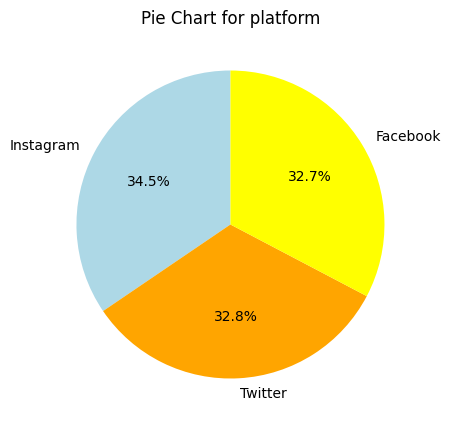

post_type


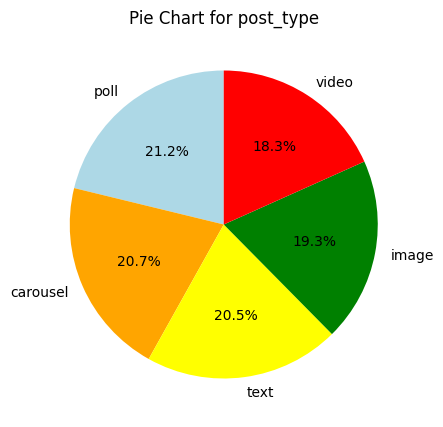

In [91]:
#Pie chart

num_cols = ['platform', 'post_type']
for col in num_cols:
        print(f"{col}")

        plt.figure(figsize=(5, 5))
        sm[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange', 'yellow', 'green', 'red'])
        plt.title(f'Pie Chart for {col}')
        plt.ylabel('')
        plt.show()


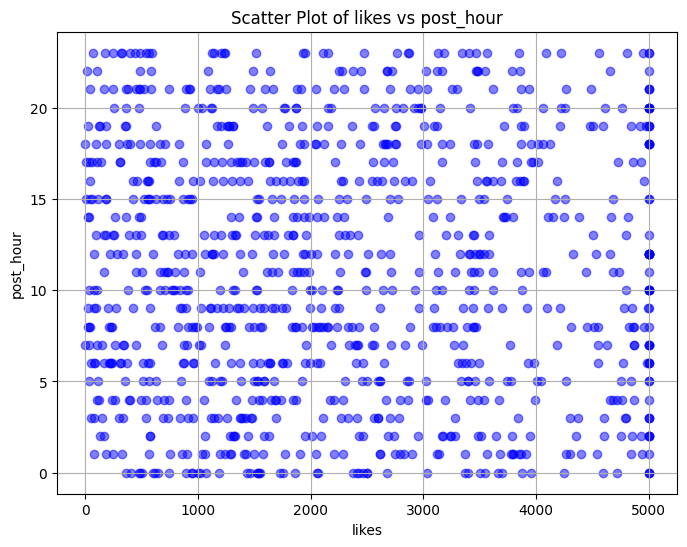

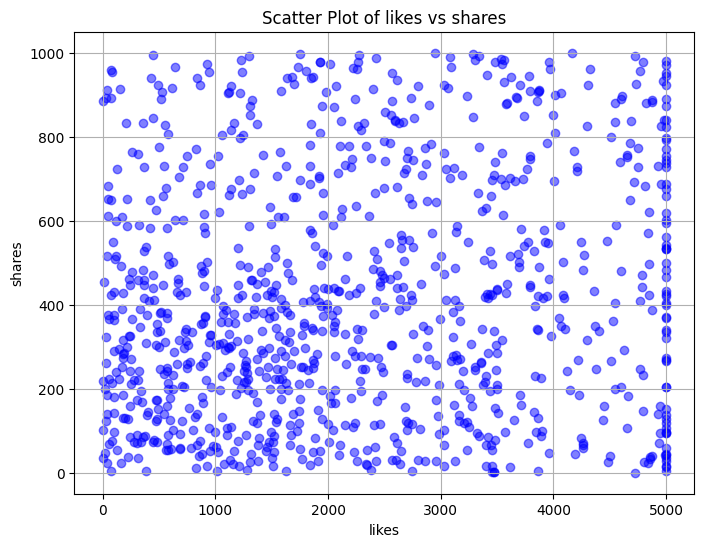

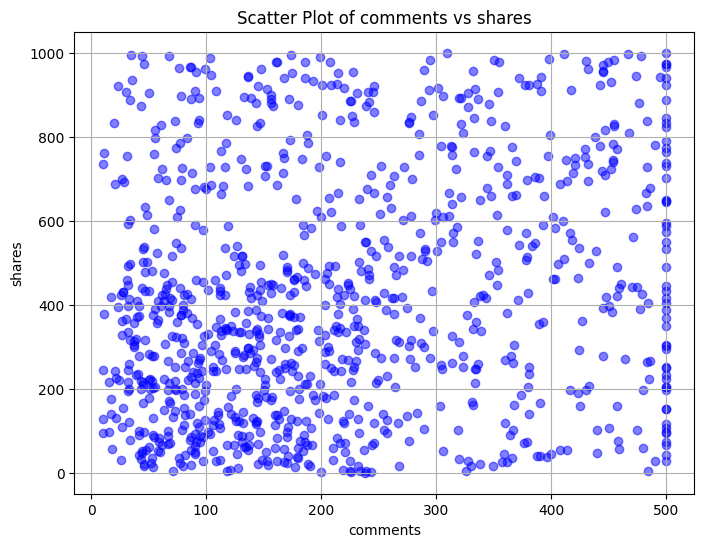

In [82]:
#scatter Plot 


col_pairs = [('likes', 'post_hour'), ('likes', 'shares'), ('comments', 'shares')]

for x_col, y_col in col_pairs:
        plt.figure(figsize=(8, 6))
        plt.scatter(sm[x_col], sm[y_col], color='blue', alpha=0.5)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(f'Scatter Plot of {x_col} vs {y_col}')
        plt.grid(True)
        plt.show()

In [ ]:
# ----------------------------------------Graphs using Seaborn---------------------------------

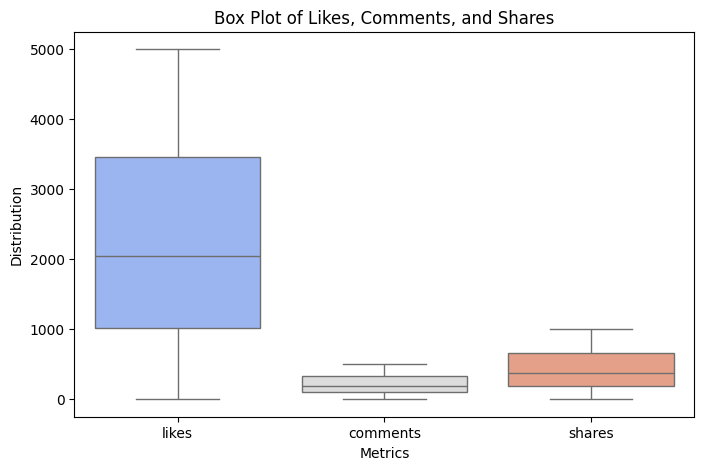

In [86]:
#Box Plot

plt.figure(figsize=(8, 5))
sns.boxplot(data=sm[['likes', 'comments', 'shares']], palette="coolwarm")
plt.xlabel("Metrics")
plt.ylabel("Distribution")
plt.title("Box Plot of Likes, Comments, and Shares")
plt.show()


C:\Users\SAINATH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\SAINATH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\SAINATH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\SAINATH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1615: UserW

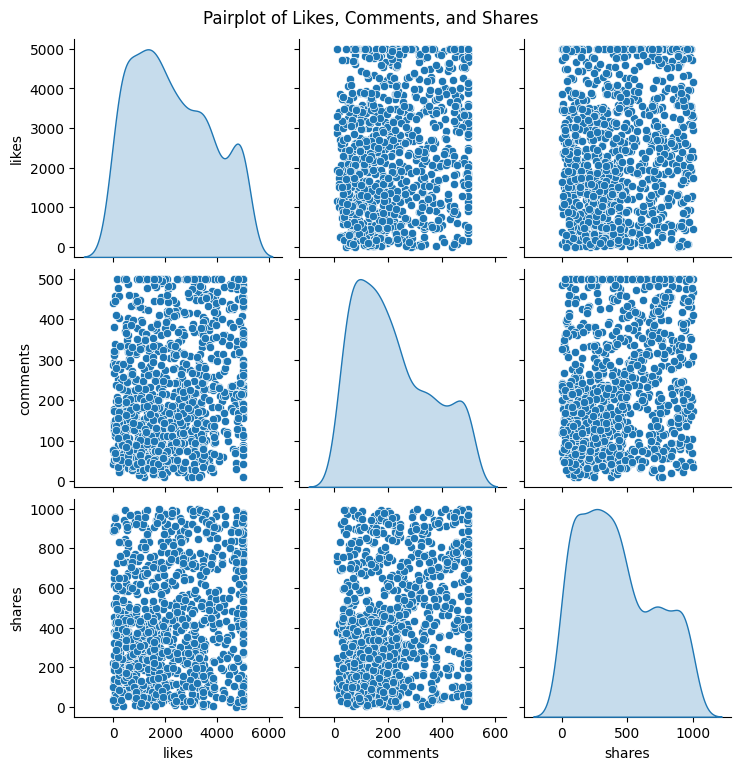

In [ ]:
#Scatter Plot

sns.pairplot(sm[['likes', 'comments', 'shares']], kind="scatter", diag_kind="kde", palette="husl")
plt.suptitle("Pairplot of Likes, Comments, and Shares", y=1.02)
plt.show()


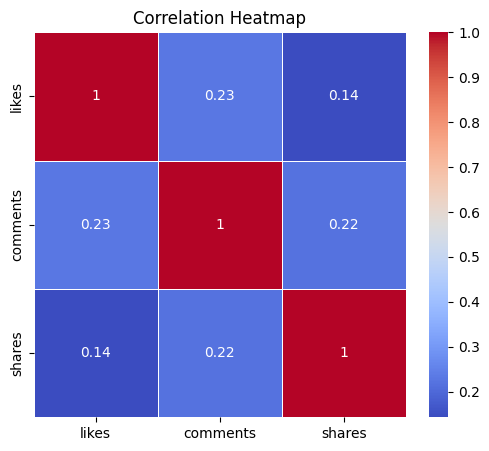

In [89]:
#Heatmap

plt.figure(figsize=(6, 5))
sns.heatmap(sm[['likes', 'comments', 'shares']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()